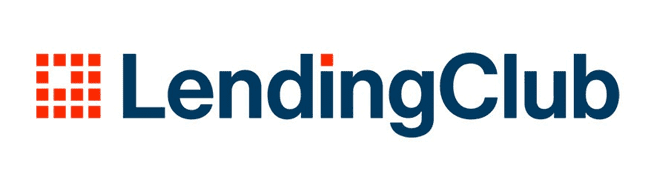

___
# Loan Default Predictor Using Decision Trees, Random Forests and Gradient Boosting
___


## Table of Contents

1. [Problem Statement](#section1)<br>
2. [Dataset Overview](#section2)<br/>
3. [Data Profiling](#section3)
    - 3.1 [Understanding the Dataset](#section301)<br/>
    - 3.2 [Establish correlation between all the features using heatmap.](#section302)<br/>
4. [Exploratory Data Analysis](#section4)
    - 4.1 [FICO score distribution based on Credit Policy](#section401)<br/>
    - 4.2 [FICO score distribution based on Not Fully Paid column](#section402)<br/>
    - 4.3 [Counts of loans fully or not fully paid based on the purpose of the loan](#section403)<br/>
    - 4.4 [Correlation between FICO score and interest rate](#section404)<br/>
    - 4.5 [Correlation between not.fully.paid and credit.policy based on FICO score and interest rate](#section405)<br/>
5. [Feature Engineering](#section5)<br/>
6. [Training and Testing Data](#section6)
7. [Training, Prediction and evaluation of the Mode](#section7)
    - 7.1 [Decision Tree](#section701)<br/>
    - 7.2 [Predictions and Evaluation of Decision Tree](#section702)<br/>
    - 7.3 [Random Forest](#section703)<br/>
    - 7.4 [Predictions and Evaluation of Random Forest](#section704)<br/>
    - 7.5 [Gradient Boosting](#section705)<br/>
    - 7.6 [Predictions and Evaluation of Gradient Boosting](#section706)<br/>
8. [Conclusion](#section8)
___

<a id='section1'></a>
## 1. Problem Statement

The notebook explores the basic use of __Pandas__ and will cover the basic commands of __Exploratory Data Analysis(EDA)__ to dive into the loan dataset. This dataset will be briefly analysed using some basic statistical tools and charts. The primary objective is to use various tree-based algorithms to correctly classify our data and answer the below questions.

For this project we will be exploring publicly available data from [LendingClub.com](www.lendingclub.com). Lending Club connects people who need money (borrowers) with people who have money (investors). 

As an investor, you would want to invest in people who showed a profile of having a high probability of paying you back. We will try to create a model that will help predict this so as to prevent the defaulting of loan payments.

We will use lending data from 2007-2010 and be trying to classify and predict whether or not the borrower will pay their loan back in full.

**Note : The dataset has been cleared of all NA values**

____

<a id='section2'></a>
## 2. Dataset Overview:

- This dataset consists of loan information. Using this data, we will attempt to answer the problem statement while exploring underlying patterns in the data. We will implement a tree-based classification models to then predict whether a customer will pay back a loan or not.

- The dataset comprises of only 9578 observations of 14 columns. Below is a table showing names of all the columns and their description.


| Column Name   | Description                                               |
| ------------- |:-------------                                            :| 
| credit.policy           | 1 if the customer meets the credit underwriting criteria of LendingClub.com, and 0 otherwise.                                                 | 
| purpose      | The purpose of the loan (takes values "credit_card", "debt_consolidation", "educational", "major_purchase", "small_business", and "all_other").                        |  
| int.rate        | The interest rate of the loan, as a proportion (a rate of 11% would be stored as 0.11). Borrowers judged by LendingClub.com to be more risky are assigned higher interest rates.                                           | 
| installment          | The monthly installments owed by the borrower if the loan is funded.                                         |   
| log.annual.inc           | The natural log of the self-reported annual income of the borrower.                                          |
| dti           | The debt-to-income ratio of the borrower (amount of debt divided by annual income)                                          |
| fico         | The FICO credit score of the borrower |
| days.with.cr.line         | The number of days the borrower has had a credit line|
| revol.bal        | The borrower's revolving balance (amount unpaid at the end of the credit card billing cycle)                                             |
| revol.util          | The borrower's revolving line utilization rate (the amount of the credit line used relative to total credit available)                                           |
| inq.last.6mths          | The borrower's number of inquiries by creditors in the last 6 months                                           |
| delinq.2yrs          | The number of times the borrower had been 30+ days past due on a payment in the past 2 years.                                           |
| pub.rec          | The borrower's number of derogatory public records (bankruptcy filings, tax liens, or judgments)                                           |
| not.fully.paid          | 1 if not fully paid and 0 if fully paid back                                           |


**Import Libraries**

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

**Import the dataset**

In [3]:
loans = pd.read_csv('loan_data.csv')

___

<a id='section3'></a>
## 3. Data Profiling

- In the upcoming sections we will first __understand our dataset__ using various pandas functionalities.
- Once we identify if there are any inconsistencies and shortcomings of the data, we will begin preprocessing it.
- In this dataset we have already cleared out all the NaN values so we do not have all that much to do to the dataset.

<a id='section301'></a>
### 3.1. Understanding the Dataset

In [169]:
loans.shape

(9578, 14)

In [4]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9578 entries, 0 to 9577
Data columns (total 14 columns):
credit.policy        9578 non-null int64
purpose              9578 non-null object
int.rate             9578 non-null float64
installment          9578 non-null float64
log.annual.inc       9578 non-null float64
dti                  9578 non-null float64
fico                 9578 non-null int64
days.with.cr.line    9578 non-null float64
revol.bal            9578 non-null int64
revol.util           9578 non-null float64
inq.last.6mths       9578 non-null int64
delinq.2yrs          9578 non-null int64
pub.rec              9578 non-null int64
not.fully.paid       9578 non-null int64
dtypes: float64(6), int64(7), object(1)
memory usage: 1.0+ MB


From the initial  data exploration we can see that we have 14 columns and 9578 rows.

In [5]:
loans.describe()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
count,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000,9.578000e+03,9578.000000,9578.000000,9578.000000,9578.000000,9578.000000
mean,0.804970,0.122640,319.089413,10.932117,12.606679,710.846314,4560.767197,1.691396e+04,46.799236,1.577469,0.163708,0.062122,0.160054
std,0.396245,0.026847,207.071301,0.614813,6.883970,37.970537,2496.930377,3.375619e+04,29.014417,2.200245,0.546215,0.262126,0.366676
min,0.000000,0.060000,15.670000,7.547502,0.000000,612.000000,178.958333,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.103900,163.770000,10.558414,7.212500,682.000000,2820.000000,3.187000e+03,22.600000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,0.122100,268.950000,10.928884,12.665000,707.000000,4139.958333,8.596000e+03,46.300000,1.000000,0.000000,0.000000,0.000000
75%,1.000000,0.140700,432.762500,11.291293,17.950000,737.000000,5730.000000,1.824950e+04,70.900000,2.000000,0.000000,0.000000,0.000000
max,1.000000,0.216400,940.140000,14.528354,29.960000,827.000000,17639.958330,1.207359e+06,119.000000,33.000000,13.000000,5.000000,1.000000


In [6]:
loans.head()

,credit.policy,purpose,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid
0,1,debt_consolidation,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0
1,1,credit_card,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0
2,1,debt_consolidation,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0
3,1,debt_consolidation,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0
4,1,credit_card,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0


In [171]:
loans.isnull().sum()

credit.policy        0
purpose              0
int.rate             0
installment          0
log.annual.inc       0
dti                  0
fico                 0
days.with.cr.line    0
revol.bal            0
revol.util           0
inq.last.6mths       0
delinq.2yrs          0
pub.rec              0
not.fully.paid       0
dtype: int64

We can see from the table above that we have only quantitative columns except for __'purpose'__. We also have no missing values in our data so we can begin exploring the columns and understand how they correlate to each other.

___

<a id='section4'></a>
## 4. Exploratory Data Analysis

Let's do some data visualization! We'll use seaborn and pandas built-in plotting capabilities to understand our data a little more clearly.

<a id='section401'></a>
### 4.1 FICO score distribution based on Credit Policy

Text(0.5, 0, 'FICO')

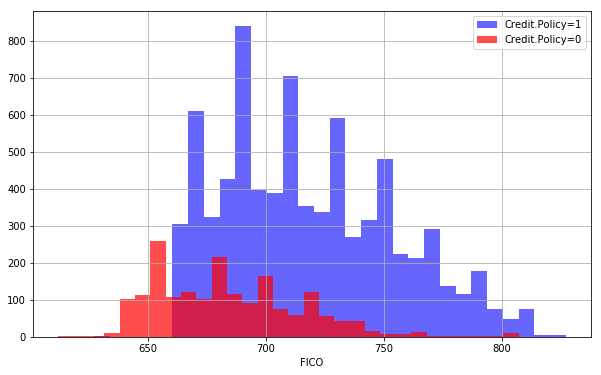

In [7]:
plt.figure(figsize=(10,6))
loans[loans['credit.policy']==1]['fico'].hist(alpha=0.6,color='blue',
                                              bins=30,label='Credit.Policy=1')
loans[loans['credit.policy']==0]['fico'].hist(alpha=0.7,color='red',
                                              bins=30,label='Credit.Policy=0')
plt.legend()
plt.xlabel('FICO')

We have plotted two overlapping histograms of __FICO__ score based on the __credit.policy__ column. This gives us a good idea of the FICO scores of customers based on the status of their credit policy.

<a id='section402'></a>
### 4.2 FICO score distribution based on Not Fully Paid column

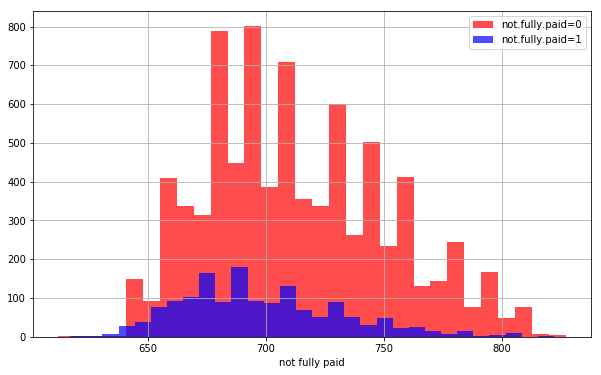

In [8]:
plt.figure(figsize=(10,6))
loans[loans['not.fully.paid']==0]['fico'].hist(alpha=0.7,color='red',
                                    bins=30,label='not.fully.paid=0')

loans[loans['not.fully.paid']==1]['fico'].hist(alpha=0.7,color='blue',
                                    bins=30,label='not.fully.paid=1')
plt.xlabel('FICO')
plt.legend()

Similar to the previous visualization, we try and understand the __FICO__ score of customers based on whether they have fully paid or not.  

<a id='section403'></a>
### 4.3 Counts of loans fully or not fully paid based on the purpose of the loan

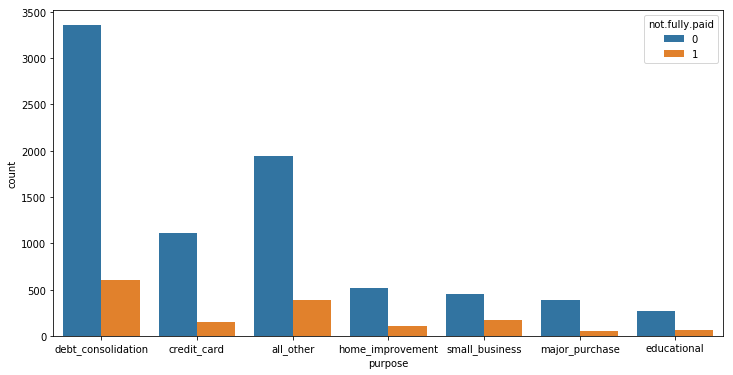

In [13]:
plt.figure(figsize=(12,6))
sns.countplot(x='purpose',data=loans,hue='not.fully.paid')

With the above graph, we have a deeper insight into the trends of paid and unpaid loans based on the purpose that the loan was taken for. The blue bar represents the number of loans that have been fully paid and the orange bar represents the loans that have not.

<a id='section404'></a>
### 4.4 Correlation between FICO score and interest rate

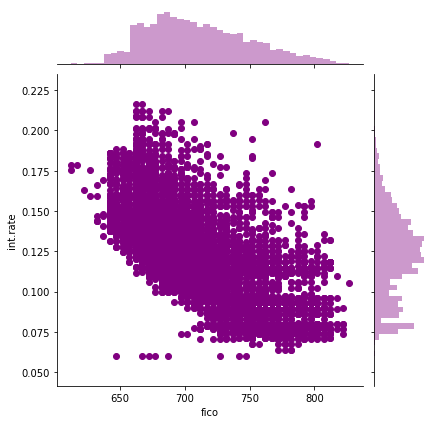

In [15]:
sns.jointplot(data=loans,x='fico',y='int.rate',color='purple')

Using a jointplot we have visualized the correlation between FICO score and interest rate. They appear to have an inverse correlation.

<a id='section405'></a>
### 4.5 Correlation between not.fully.paid and credit.policy based on FICO score and interest rate

<Figure size 792x504 with 0 Axes>

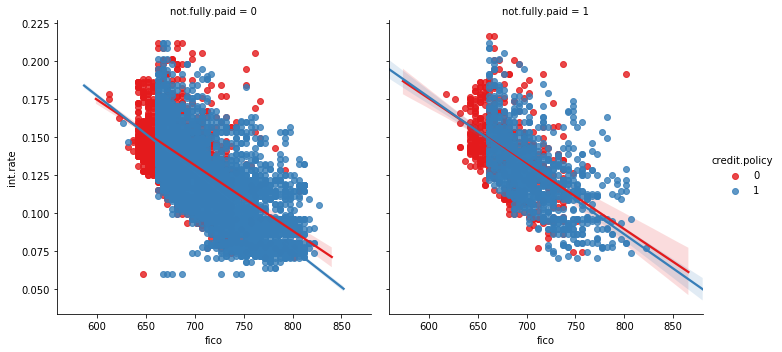

In [17]:
plt.figure(figsize=(11,7))
sns.lmplot(y='int.rate',x='fico',data=loans,hue='credit.policy',
           col='not.fully.paid',palette='Set1')

____

<a id='section5'></a>
## 5. Feature Engineering

Notice that the **purpose** column is categorical.

That means we need to transform it using dummy variables so sklearn will be able to understand them. We do this in one clean step using pd.get_dummies.

In [19]:
cat_feats = ['purpose']

This list can be expanded to for more than one categorical feature in future if required.

In [20]:
final_data = pd.get_dummies(loans,columns=cat_feats,drop_first=True)

In [21]:
final_data.head()

,credit.policy,int.rate,installment,log.annual.inc,dti,fico,days.with.cr.line,revol.bal,revol.util,inq.last.6mths,delinq.2yrs,pub.rec,not.fully.paid,purpose_credit_card,purpose_debt_consolidation,purpose_educational,purpose_home_improvement,purpose_major_purchase,purpose_small_business
0,1,0.1189,829.10,11.350407,19.48,737,5639.958333,28854,52.1,0,0,0,0,0,1,0,0,0,0
1,1,0.1071,228.22,11.082143,14.29,707,2760.000000,33623,76.7,0,0,0,0,1,0,0,0,0,0
2,1,0.1357,366.86,10.373491,11.63,682,4710.000000,3511,25.6,1,0,0,0,0,1,0,0,0,0
3,1,0.1008,162.34,11.350407,8.10,712,2699.958333,33667,73.2,1,0,0,0,0,1,0,0,0,0
4,1,0.1426,102.92,11.299732,14.97,667,4066.000000,4740,39.5,0,1,0,0,1,0,0,0,0,0


Our dataframe __final_data__ now contains the transformed feature __purpose__ in a format that can be understood by our algorithm.

In [190]:
final_data['not.fully.paid'].value_counts()

0    8045
1    1533
Name: not.fully.paid, dtype: int64

We can also see that our dataset is quite __imbalanced__ in terms of our target variable. We have __more than 5 times__ the amount of class 0 instances as the number of class 1 instances. Due to this, our predictions could be more biased towards the more common class.

___

<a id='section6'></a>
## 6. Training and Testing Data

Now its time to split our data into a training set and a testing set!

In [22]:
from sklearn.model_selection import train_test_split

In [112]:
X = final_data.drop('not.fully.paid',axis=1)
y = final_data['not.fully.paid']

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

___

<a id='section7'></a>
## 7. Training, Prediction and evaluation of the Models

In this section we will train our various models, evaluate them ad compare each algorithm to see which one did best.

<a id='section701'></a>
### 7.1 Decision Tree

We will first try and solve our problem statement using a simple decision tree.

In [27]:
from sklearn.tree import DecisionTreeClassifier

**We create an instance of DecisionTreeClassifier() called dtree and fit it to the training data.**

In [114]:
dtree = DecisionTreeClassifier()

In [115]:
dtree.fit(X_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

We were able to create our Decision Tree model and fit it to our training data. Next we can predict our target variable with out test set and evaluate our models performance.

<a id='section702'></a>
### 7.2 Predictions and Evaluation of Decision Tree

In [116]:
predictions = dtree.predict(X_test)

We now have our predictions in the __predictions__ variable which we have obtained by using out test set.

In [117]:
from sklearn.metrics import classification_report,confusion_matrix 

In [118]:
print(confusion_matrix(y_test,predictions))

[[1999  409]
 [ 373   93]]


Our show that we make quite a few type 1(FP) and type 2(FN) errors in our prediction. Lets use a classification report to inspect other metrics such as f1-score,precision and recall.

In [119]:
print(classification_report(y_test,predictions))

              precision    recall  f1-score   support

           0       0.84      0.83      0.84      2408
           1       0.19      0.20      0.19       466

   micro avg       0.73      0.73      0.73      2874
   macro avg       0.51      0.51      0.51      2874
weighted avg       0.74      0.73      0.73      2874



We can see that our precision, recall and f1-score is relatively high for our predictions of not.fully.paid = 0 but they are very low for not.fully.paid = 0 data points.

In [244]:
print("Accuracy score Decision Tree (validation): {0:.3f}".format(dtree.score(X_test, y_test)))

Accuracy score Decision Tree (validation): 0.728


Lastly, we will check the efficiency score on our validation set. Our accuracy score appears to be __72.8%__.

<a id='section703'></a>
### 7.3 Random Forest

Next lets try and use a random forest and see how well it performs on our data!

In [172]:
from sklearn.ensemble import RandomForestClassifier

- Before we train our Random Forest model, it would do us well to understand how to tune our hyperparameters in order to gain the most accuracy possible.
- To do this, we will first use RandomizedSearchCV to throw some parameter values at our random forest to get an estimated range of hyperparameters we can use. 
- If necessary, we can then move on to using a traditional GridSearchCV to further optimize our parameter values.

In [179]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 100, stop = 2000, num = 10)]
# Number of features to consider at every split
max_features = ['auto', 'sqrt']
# Maximum number of levels in tree
max_depth = [int(x) for x in np.linspace(10, 110, num = 11)]
max_depth.append(None)
# Minimum number of samples required to split a node
min_samples_split = [2, 5, 10]
# Minimum number of samples required at each leaf node
min_samples_leaf = [1, 2, 4]
# Method of selecting samples for training each tree
bootstrap = [True, False]
# Create the random grid
random_grid = {'n_estimators': n_estimators,
               'max_features': max_features,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf,
               'bootstrap': bootstrap}
print(random_grid)

{'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]}


We have created a random grid with different values for each parameter. We will now use this as our parameter distribution. Below we will create a RandomForestClassifier instance and train it on our training dataset.

In [195]:
rf_class = RandomForestClassifier()
rf_class_CV = RandomizedSearchCV(estimator = rf_class, param_distributions = random_grid, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_class_CV.fit(X_train,y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  2.6min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed: 11.2min
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed: 20.8min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators='warn', n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [100, 311, 522, 733, 944, 1155, 1366, 1577, 1788, 2000], 'max_features': ['auto', 'sqrt'], 'max_depth': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, None], 'min_samples_split': [2, 5, 10], 'min_samples_leaf': [1, 2, 4], 'bootstrap': [True, False]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

<a id='section704'></a>
### 7.4 Predictions and Evaluation of Random Forest

We have successfully trained our model on our training data. Now we can check out the best parameters we have found and use this as an estimate to further tune these parameters to improve performance.

In [200]:
rf_class_CV.best_estimator_

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=50, max_features='sqrt', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=4, min_samples_split=10,
            min_weight_fraction_leaf=0.0, n_estimators=733, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [196]:
rf_class_CV.best_params_

{'n_estimators': 733,
 'min_samples_split': 10,
 'min_samples_leaf': 4,
 'max_features': 'sqrt',
 'max_depth': 50,
 'bootstrap': True}

After inspecting our best parameters, we will now evaluate our model after making predictions on our validation set.

In [199]:
predict_random = rf_class_CV.predict(X_test)
print(confusion_matrix(y_test,predict_random))

[[2406    2]
 [ 464    2]]


In [201]:
print(classification_report(y_test,predict_random))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       0.50      0.00      0.01       466

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.67      0.50      0.46      2874
weighted avg       0.78      0.84      0.77      2874



In [243]:
print("Accuracy score Random Forest Randomized parameters (validation): {0:.3f}".format(best_random.score(X_test, y_test)))

Accuracy score Random Forest Randomized parameters (validation): 0.838


Our accuracy score is about 83.8% but note that our f1-score, recall and precision score is extremely low for predicting the class 1. This is again probably due to the fact that our dataset is not balanced.

In [213]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [50, 80, 100, 120],
    'max_features': ['sqrt'],
    'min_samples_leaf': [2, 3, 4],
    'min_samples_split': [10, 12, 14],
    'n_estimators': [700, 800, 900, 1000]
}

# Create a based model
rf_class_grid = RandomForestClassifier()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf_class_grid, param_grid = param_grid, 
                        cv = 3, n_jobs = -1, verbose = 2)

In [214]:
grid_search.fit(X_train, y_train)

grid_search.best_params_

Fitting 3 folds for each of 144 candidates, totalling 432 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.5min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  6.7min
[Parallel(n_jobs=-1)]: Done 357 tasks      | elapsed: 15.3min
[Parallel(n_jobs=-1)]: Done 432 out of 432 | elapsed: 18.5min finished


{'bootstrap': True,
 'max_depth': 120,
 'max_features': 'sqrt',
 'min_samples_leaf': 4,
 'min_samples_split': 14,
 'n_estimators': 1000}

In [215]:
predict_random_grid = grid_search.predict(X_test)
print(confusion_matrix(y_test,predict_random_grid))

[[2408    0]
 [ 464    2]]


In [216]:
print(classification_report(y_test,predict_random_grid))

              precision    recall  f1-score   support

           0       0.84      1.00      0.91      2408
           1       1.00      0.00      0.01       466

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.92      0.50      0.46      2874
weighted avg       0.86      0.84      0.77      2874



In [242]:
print("Accuracy score Random Forest GridSearchCV (validation): {0:.3f}".format(grid_search.score(X_test, y_test)))

Accuracy score Random Forest GridSearchCV (validation): 0.839


With our GridSearchCV, we were able to minutely better our performance but the increase is quite insignificant and we can see the same problem we had with respect to our predictions of class 1.

<a id='section705'></a>
### 7.5 Gradient Boosting

Lastly, lets check out how a gradient boosting model would fare. We will implement the same steps that we took during the training and prediction of our random forest model.

In [140]:
from sklearn.ensemble import GradientBoostingClassifier

In [141]:
from sklearn.model_selection import RandomizedSearchCV
# Number of trees in random forest
n_estimators = [int(x) for x in np.linspace(start = 10, stop = 200, num = 10)]
# Number of features to consider at every split
learning_rate= [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1]
# Maximum number of levels in tree
max_depth = [1,2,3,4,5]
max_depth.append(None)
max_features = [1,2,3,4,5]
random_grid_boosting = {'n_estimators': n_estimators,
               'learning_rate': learning_rate,
               'max_depth': max_depth,
               'max_features': max_features}
print(random_grid_boosting)

{'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 'max_depth': [1, 2, 3, 4, 5, None], 'max_features': [1, 2, 3, 4, 5]}


Using randomized set of parameters to test our models performance

In [142]:
gb_clf = GradientBoostingClassifier()

rf_boosted_CV = RandomizedSearchCV(estimator = gb_clf, param_distributions = random_grid_boosting, n_iter = 100, cv = 3, verbose=2, random_state=42, n_jobs = -1)
rf_boosted_CV.fit(X_train, y_train)

Fitting 3 folds for each of 100 candidates, totalling 300 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:    6.4s
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:   34.7s
[Parallel(n_jobs=-1)]: Done 300 out of 300 | elapsed:  1.5min finished


RandomizedSearchCV(cv=3, error_score='raise-deprecating',
          estimator=GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_sampl...      subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False),
          fit_params=None, iid='warn', n_iter=100, n_jobs=-1,
          param_distributions={'n_estimators': [10, 31, 52, 73, 94, 115, 136, 157, 178, 200], 'learning_rate': [0.05, 0.075, 0.1, 0.25, 0.5, 0.75, 1], 'max_depth': [1, 2, 3, 4, 5, None], 'max_features': [1, 2, 3, 4, 5]},
          pre_dispatch='2*n_jobs', random_state=42, refit=True,
          return_train_score='warn', scoring=None, verbose=2)

In [143]:
rf_boosted_CV.best_params_

{'n_estimators': 94,
 'max_features': 2,
 'max_depth': None,
 'learning_rate': 0.075}

In [241]:
print("Accuracy score Gradient Boost Randomized Parameters (validation): {0:.3f}".format(rf_boosted_CV.score(X_test, y_test)))

Accuracy score Gradient Boost Randomized Parameters (validation): 0.836


__Using grid search in order to tune our model for better performance__

In [229]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid_boost = {
    'max_depth': [1,2,4],
    'max_features': [2],
    'learning_rate': [0.075,0.1,0.06,0.2,0.3],
    'n_estimators': [90,100,120]
}

# Create a based model
rf_class_boost = GradientBoostingClassifier()
# Instantiate the grid search model
grid_search_boost = GridSearchCV(estimator = rf_class_boost, param_grid = param_grid_boost, 
                        cv = 3, n_jobs = -1, verbose = 2)

In [230]:
grid_search_boost.fit(X_train, y_train)

grid_search_boost.best_params_

Fitting 3 folds for each of 45 candidates, totalling 135 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  58 tasks      | elapsed:    3.0s
[Parallel(n_jobs=-1)]: Done 128 out of 135 | elapsed:    6.9s remaining:    0.3s
[Parallel(n_jobs=-1)]: Done 135 out of 135 | elapsed:    7.3s finished


{'learning_rate': 0.1, 'max_depth': 4, 'max_features': 2, 'n_estimators': 100}

<a id='section706'></a>
### 7.6 Predictions and Evaluation of Gradient Boosting

In [231]:
predict_random_boost = grid_search_boost.predict(X_test)
print(confusion_matrix(y_test,predict_random_boost))

[[2390   18]
 [ 451   15]]


In [232]:
print(classification_report(y_test,predict_random_boost))

              precision    recall  f1-score   support

           0       0.84      0.99      0.91      2408
           1       0.45      0.03      0.06       466

   micro avg       0.84      0.84      0.84      2874
   macro avg       0.65      0.51      0.49      2874
weighted avg       0.78      0.84      0.77      2874



In [239]:
print("Accuracy score Gradient Boosting GridSearchCV (validation): {0:.3f}".format(grid_search_boost.score(X_test, y_test)))

Accuracy score Gradient Boosting GridSearchCV (validation): 0.837


___

<a id='section8'></a>
## 8. Conclusion
- In this notebook, we used various libraries to do an Exploratory Data Analyis of our LendingClub data.
- We have made use of packages like __pandas and seaborn__ to develop better insights about the data.<br/>
- We initially used a decision tree on our data to see how it would fare. After checking the accuracy score, we moved on to a random forest model and evaluated the same.
- We lastly use gradient boosting to compare the performance of the model against our previous two models.
- We saw that our decision tree had a relatively low accuracy score. We then moved on to analyze both the random forest and gradient boosting models.
- Next we used RandomizedSearchCV to throw some figures at these models to see how well they would do. Once we analyzed these parameter values, we moved on to using a GridSearchCV to test various combinations of these parameter values and tune our model further. Lastly we evaluated all of our models.
- A common recurrence in all our models is the inability to predict instances of class 1 (type 2 errors) of our target variable. This is most likely due to the fact that our data is not very balanced at all. We have almost 5 times the number of class 0 instances in our dataset compared to class 1 instances. This would naturally bias our predictions to the more common class.
- To fix this issue, we could __under-sample__ our dataset by only choosing an equal number of class 0 samples as class 1 samples and risk losing important and potentially critical information that could benefit our predictions. Alternatively, we could also __over-sample__ our dataset, by randomly duplicating samples of class 1 till we have a number closer to the number of class 0 samples, and risk more complexity and overfitting due to the fact that we will have multiple duplicate samples.
- These options will not be explored in this notebook. Our objective was to analyze the dataset and understand how various models would be able to predict the target variables. We were able to do this and evaluate each of these models using metrics such as confusion matrix, classification report and accuracy score.
<br/><br/>

____________